# **Fake News Predicition**

About the Dataset:
1.id: unique id for a news article
2.Title: the title of a news article
3.Author: author of the news article
4.Text: the text of the article; could be incomplete
5.label: a label that marks whether the news is real or fake:


```
1: Fake news
0: Real news
```



Importing the Dependencies

In [17]:
import numpy as np #for making numpy arrays
import pandas as pd #useful for creating and storing data in data-frame
import re #Regualr expression library, useful for searching words in a text/paragraph
from nltk.corpus import stopwords #nltk --> natural language tool kit. stopwords include a,and,so (not so useful words)
from nltk.stem.porter import PorterStemmer #stemming removes prefix and suffix of word, gives root word.
from sklearn.feature_extraction.text import TfidfVectorizer #convert text to feature vectors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #good for binary clssification
from sklearn.metrics import accuracy_score

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
#printing stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-Processing

In [20]:
#loading dataset to a pandas dataframe
news_dataset = pd.read_csv('/content/train.csv')

In [21]:
news_dataset.shape

(20800, 5)

In [22]:
# print 5 first rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [23]:
# check for missing values
# count the number of missing values in the dataset (in each column)
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [24]:
#since we have a large dataset we can drop the null values
#replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [25]:
#merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [26]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [27]:
from tkinter.constants import X
#seprating the data & label
X = news_dataset.drop(columns='label',axis=1) # axis = 1 to remove column
Y = news_dataset['label']

In [28]:
print(X)
print(Y)

          id  ...                                            content
0          0  ...  Darrell Lucus House Dem Aide: We Didn’t Even S...
1          1  ...  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2          2  ...  Consortiumnews.com Why the Truth Might Get You...
3          3  ...  Jessica Purkiss 15 Civilians Killed In Single ...
4          4  ...  Howard Portnoy Iranian woman jailed for fictio...
...      ...  ...                                                ...
20795  20795  ...  Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796  20796  ...  Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797  20797  ...  Michael J. de la Merced and Rachel Abrams Macy...
20798  20798  ...  Alex Ansary NATO, Russia To Hold Parallel Exer...
20799  20799  ...            David Swanson What Keeps the F-35 Alive

[20800 rows x 5 columns]
0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 2080

Stemming:

Stemming is the process of reducing a word to its root word.

Examples:
actor, actress, acting --> act

In [29]:
 port_stem = PorterStemmer()

In [30]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content) #replacing all non-alphabetic characters from value if content
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split() #words will be converted to a list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [31]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [32]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [34]:
#Separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [35]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [36]:
print(Y)

[1 0 1 ... 0 1 1]


In [37]:
Y.shape

(20800,)

In [38]:
# Converting the textual data to numercal data
vectorizer = TfidfVectorizer() #Tf --> term frequency #idf --> Inverse document frequency
vectorizer.fit(X)

X = vectorizer.transform(X)

In [39]:
print(X)

  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (20797, 8364)	0.22322585870464115
  (20797, 8988)	0.36160868928090795
  (20797, 9518)	0.29542040034203126
  (20797, 9588)	0.17455348

Spliting the dataset to training and text data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)


Training the Model: Logistic Regression

In [41]:
model = LogisticRegression()

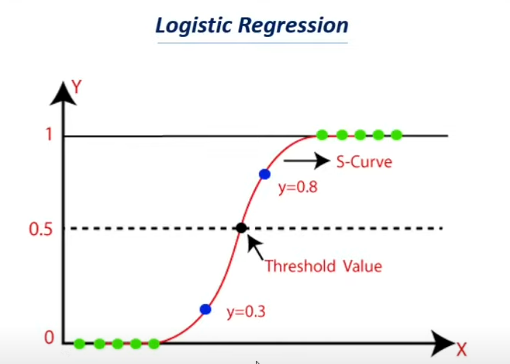

Above shows how Logistic Regression works: check if value is abobe a certain threshold in this case 0.5 if above threshold value is = 1. if below threshold value is = 0.

In [42]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluate Model

Accuracy score

In [43]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [44]:
print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.9863581730769231


In [45]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.9790865384615385


since accuracy scores are similair --> model has not overtrained with the training data and is performing well.

Make a Predictive System

In [47]:
from tkinter import E
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [49]:
print(Y_test[0])

1


Model has predicted correctly

You can change the value [0] to predict and check other news